# Jan 16 Lecture support code

In lecture today, we discussed the k Nearest Neighbors algorithm for classification.  The basic algorithm is very simple.

1. Calculate the distance from $x$ to all $x_i$
2. Select the k training instances with the lowest distance  to $x$
3. Label $x$ with the most common label of the corresponding $y_i$

We will demonstrate it on the iris dataset.

In [61]:

import numpy as np # numpy
import pandas as pd # pandas for datasets
from sklearn.datasets import load_iris

# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_iris.html
iris = load_iris()

iris.data[0:10]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

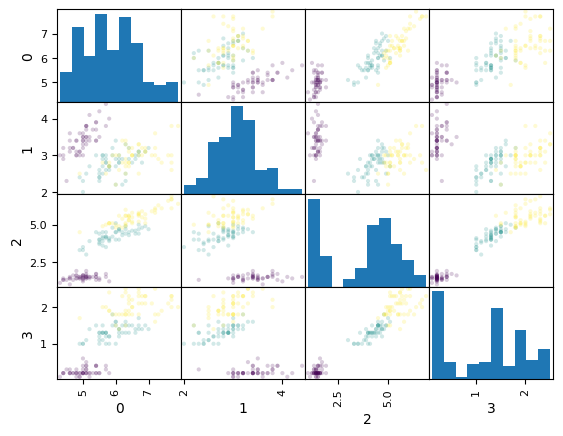

In [62]:
# We will use a convenience method from pandas to examine the data
pd.plotting.scatter_matrix(pd.DataFrame(data=iris.data), c=iris.target, alpha=0.2)

First, we will split the dataset - 70% will be used as our training set, and the remaining 30% we will test our result on.

In [63]:
import math

# Get list of indices, shuffle them, and build training data and training labels, and likewise test data and test labels.
indices = np.arange(len(iris.data))
np.random.shuffle(indices)
train_cutoff = math.floor(len(indices) * 0.7)
trainX = iris.data[indices][0:train_cutoff]
trainY = iris.target[indices][0:train_cutoff]
testX = iris.data[indices][train_cutoff:]
testY = iris.target[indices][train_cutoff:]

array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

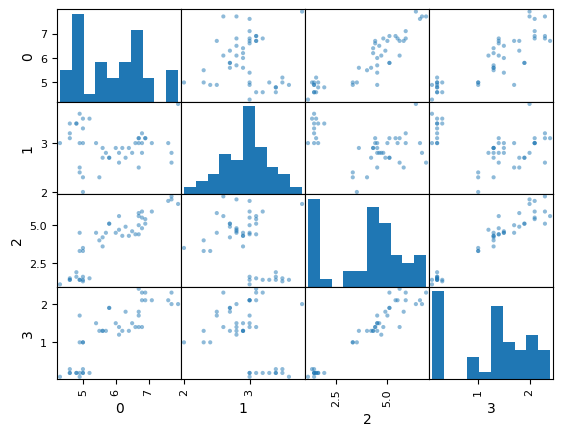

In [64]:
# Visualizing the test set - remember it has no known labels
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), alpha=0.5)


Next, we create our predicted labels and compare them to the ground truth.

In [65]:
# kNN algorithm
k=5
# 1. calculate distances between test examples and training examples
distances = np.zeros((len(trainX), len(testX)))
for i in range(len(trainX)):
    for j in range(len(testX)):
        distances[i,j] = np.sqrt(np.sum(np.square(trainX[i] - testX[j])))

# 2. for each data point, select k closest training instances
predY = np.zeros_like(testY)
for j in range(len(predY)):
    indices = np.argsort(distances[:,j])[0:k]
    neighborYs = trainY[indices]
    # neighborYs = trainY[0:k]
    # Get most common vote https://stackoverflow.com/questions/6252280/find-the-most-frequent-number-in-a-numpy-array
    counts = np.bincount(neighborYs)
    print(counts)
    predY[j] = np.argmax(counts)

print(testY)

[0 1 4]
[0 5]
[5]
[0 0 5]
[0 0 5]
[0 4 1]
[5]
[5]
[0 5]
[0 0 5]
[0 0 5]
[5]
[0 5]
[0 5]
[5]
[0 2 3]
[0 0 5]
[5]
[0 5]
[0 0 5]
[0 5]
[0 5]
[0 0 5]
[0 5]
[0 0 5]
[0 1 4]
[0 0 5]
[0 5]
[0 0 5]
[0 5]
[0 1 4]
[5]
[5]
[5]
[0 4 1]
[0 5]
[0 5]
[0 1 4]
[0 4 1]
[0 5]
[0 0 5]
[0 4 1]
[5]
[5]
[5]
[2 1 0 2 2 1 0 0 1 2 2 0 1 1 0 1 2 0 1 2 1 1 2 1 2 2 2 1 2 1 2 0 0 0 1 1 1
 2 1 1 2 2 0 0 0]


Next, we compare our predictions to the ground truth.  We calculate our accuracy, and also compare visually where we make mistakes.

In [66]:
isCorrect = (predY == testY)
accuracy = sum(isCorrect)/len(testY)
print(accuracy)

0.9555555555555556


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

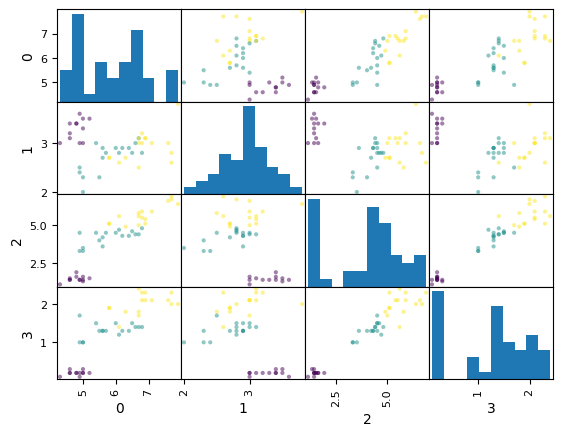

In [67]:
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), c=predY, alpha=0.5)


array([[<Axes: xlabel='0', ylabel='0'>, <Axes: xlabel='1', ylabel='0'>,
        <Axes: xlabel='2', ylabel='0'>, <Axes: xlabel='3', ylabel='0'>],
       [<Axes: xlabel='0', ylabel='1'>, <Axes: xlabel='1', ylabel='1'>,
        <Axes: xlabel='2', ylabel='1'>, <Axes: xlabel='3', ylabel='1'>],
       [<Axes: xlabel='0', ylabel='2'>, <Axes: xlabel='1', ylabel='2'>,
        <Axes: xlabel='2', ylabel='2'>, <Axes: xlabel='3', ylabel='2'>],
       [<Axes: xlabel='0', ylabel='3'>, <Axes: xlabel='1', ylabel='3'>,
        <Axes: xlabel='2', ylabel='3'>, <Axes: xlabel='3', ylabel='3'>]],
      dtype=object)

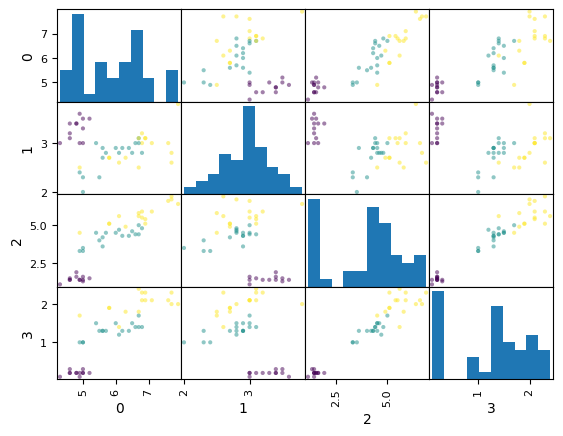

In [68]:
pd.plotting.scatter_matrix(pd.DataFrame(data=testX), c=testY, alpha=0.5)
